# Bengali Text to IPA (International Phonetic Alphabet) Transcription

**Converting Bangla text to IPA (International Phonetic Alphabet) transcription involves representing Bangla words or sentences with a series of phonetic symbols that describe how the words are pronounced. This process captures the precise sounds of each Bangla character, making it possible to transcribe the language's pronunciation systematically. For example, the Bangla word "বাংলা" (pronounced as "Bangla") could be transcribed into IPA as /ˈbæŋ.lɑ/. This IPA transcription helps linguists, language learners, and speech technology applications accurately represent the spoken sounds of Bangla.**

# # Analyzing the training dataset

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/databangla.csv')
data.head()

,Unnamed: 0,text,ipa
0,0,এরপরও তারা বকেয়া পরিশোধ করেনি।,eɾpɔɾo t̪ɐɾɐ bɔkeʲɐ poɾiʃod̪ʱ kɔɾeni।
1,1,আগে সুইস ব্যাংকে জমা টাকার কোনো প্রতিবেদন প্রক...,ɐge ʃu͡i̯ʃ bɛŋke ɟɔmɐ tɐkɐɾ kono pɾot̪ibed̪ɔn...
2,2,আদালত প্রতিষ্ঠানটি সিলগালা করে দেয়।,ɐd̪ɐlɔt̪o pɾot̪iʃtʰɐnti silgɐlɐ koɾe d̪eʲ।
3,3,রায়ে তাদের দোষী সাব্যস্ত করা হলেও সাজা আগামী স...,ɾɐʲe t̪ɐd̪eɾ d̪oʃi sɐbbost̪o kɔɾɐ hole͡o̯ ʃɐɟ...
4,4,গ্রেফতারের পর থেকে তাদের বাঁচাতে এলাকার প্রভাব...,gɾepʰt̪ɐɾeɾ pɔɾ t̪ʰeke t̪ɐd̪eɾ bɐ̃cɐt̪e elɐkɐ...


In [ ]:
df = pd.DataFrame(data)
# Split text into words and create a new DataFrame
text_df = df['text'].str.split(expand=True).stack().reset_index(level=1, drop=True).reset_index(name='text_word')

# Split IPA into words and create a new DataFrame
ipa_df = df['ipa'].str.split(expand=True).stack().reset_index(level=1, drop=True).reset_index(name='ipa_word')

# Display the resulting DataFrames
print("Text DataFrame:")
# print(text_df)
text_df.head(20)

# saving the dataframe
# text_df.to_csv('text_df.csv')


Text DataFrame:


,index,text_word
0,0,এরপরও
1,0,তারা
2,0,বকেয়া
3,0,পরিশোধ
4,0,করেনি।
5,1,আগে
6,1,সুইস
7,1,ব্যাংকে
8,1,জমা
9,1,টাকার


In [ ]:
print('Length of the Text Dataframe:')
print(len(text_df))

Length of the Text Dataframe:
236803


In [ ]:
print("\nIPA DataFrame:")
# print(ipa_df)
ipa_df.head(20)
# ipa_df.to_csv('ipa_df.csv')


IPA DataFrame:


,index,ipa_word
0,0,eɾpɔɾo
1,0,t̪ɐɾɐ
2,0,bɔkeʲɐ
3,0,poɾiʃod̪ʱ
4,0,kɔɾeni।
5,1,ɐge
6,1,ʃu͡i̯ʃ
7,1,bɛŋke
8,1,ɟɔmɐ
9,1,tɐkɐɾ


In [ ]:
print('Length of the IPA Dataframe:')
print(len(ipa_df))

Length of the IPA Dataframe:
236788


# # Data Visualization

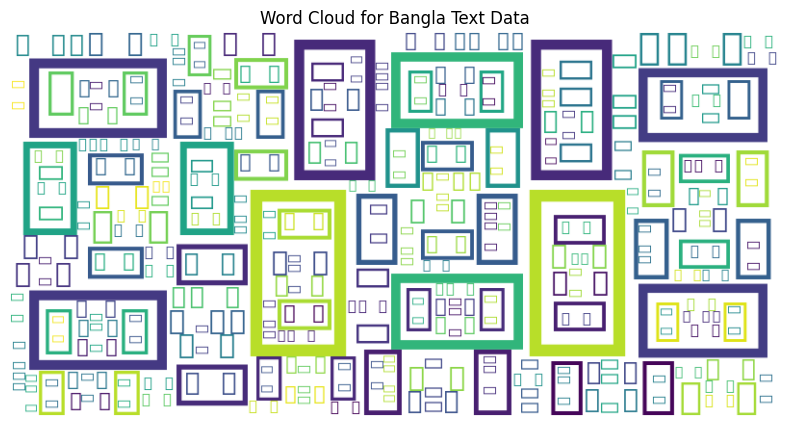

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = " ".join(text_df['text_word'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Add a title label
plt.title("Word Cloud for Bangla Text Data")

plt.show()


In [ ]:
import pandas as pd

# Specify the path to your CSV files
text_csv_path = '/content/text_df.csv'
ipa_csv_path = '/content/ipa_df.csv'

# Read the CSV files into DataFrames with the header
text_df = pd.read_csv(text_csv_path)
ipa_df = pd.read_csv(ipa_csv_path)

# Extract the 'text_word' and 'ipa_word' columns
text_word = text_df['text_word']
ipa_word = ipa_df['ipa_word']

# Merge the dataframes based on their index
merged_df = pd.concat([text_word, ipa_word], axis=1)

# Rename the columns if needed
merged_df.columns = ['text_word', 'ipa_word']

# Display the merged dataframe
# print(merged_df)
merged_df.head()
# merged_df.to_csv('merged_data.csv')


,text_word,ipa_word
0,এরপরও,eɾpɔɾo
1,তারা,t̪ɐɾɐ
2,বকেয়া,bɔkeʲɐ
3,পরিশোধ,poɾiʃod̪ʱ
4,করেনি।,kɔɾeni।


In [ ]:
print('Length of the Merged (Text + IPA) Dataframe:')
print(len(merged_df))

Length of the Merged (Text + IPA) Dataframe:
236789


# # Model Training

In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


# Specify the path to your CSV file
csv_file_path = '/content/merged_data.csv'
# Read the CSV file into a DataFrame with the header
data = pd.read_csv(csv_file_path)

# Split the data into input (Bengali words) and target (IPA transcriptions)
# X = data['text_word'].values
# y = data['ipa_word'].values

X = data['text_word'].astype(str).values
y = data['ipa_word'].astype(str).values

# Tokenize the input text and target IPA transcriptions
input_tokenizer = Tokenizer(filters=' ')
input_tokenizer.fit_on_texts(X)
X_seq = input_tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, padding='post')

target_tokenizer = Tokenizer(char_level=True, oov_token='[UNK]')
target_tokenizer.fit_on_texts(y)
y_seq = target_tokenizer.texts_to_sequences(y)
y_padded = pad_sequences(y_seq, padding='post')

# One-hot encode the target sequences
y_one_hot = to_categorical(y_padded, num_classes=len(target_tokenizer.word_index) + 1)

# Build the sequence-to-sequence model
input_vocab_size = len(input_tokenizer.word_index) + 1
output_vocab_size = len(target_tokenizer.word_index) + 1

model = keras.Sequential([
    layers.Embedding(input_dim=input_vocab_size, output_dim=100, input_length=X_padded.shape[1]),
    layers.LSTM(100),
    layers.RepeatVector(y_padded.shape[1]),
    layers.LSTM(100, return_sequences=True),
    layers.TimeDistributed(layers.Dense(output_vocab_size, activation='softmax'))
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the full dataset
model.fit(X_padded, y_one_hot, epochs=10, batch_size=64)


Epoch 1/10
3700/3700 [==============================] - 512s 137ms/step - loss: 0.5347 - accuracy: 0.8574
Epoch 2/10
3700/3700 [==============================] - 485s 131ms/step - loss: 0.2315 - accuracy: 0.9344
Epoch 3/10
3700/3700 [==============================] - 498s 135ms/step - loss: 0.1326 - accuracy: 0.9610
Epoch 4/10
3700/3700 [==============================] - 502s 136ms/step - loss: 0.0933 - accuracy: 0.9721
Epoch 5/10
3700/3700 [==============================] - 486s 131ms/step - loss: 0.0719 - accuracy: 0.9782
Epoch 6/10
3700/3700 [==============================] - 470s 127ms/step - loss: 0.0575 - accuracy: 0.9825
Epoch 7/10
3700/3700 [==============================] - 456s 123ms/step - loss: 0.0476 - accuracy: 0.9855
Epoch 8/10
3700/3700 [==============================] - 465s 126ms/step - loss: 0.0397 - accuracy: 0.9878
Epoch 9/10
3700/3700 [==============================] - 472s 127ms/step - loss: 0.0348 - accuracy: 0.9893
Epoch 10/10
3700/3700 [=======================

# # Predicting IPA transcription for a Bangla word

In [ ]:
# Define a function to predict IPA transcriptions
def predict_ipa(bengali_word):
    bengali_word_seq = input_tokenizer.texts_to_sequences([bengali_word])
    bengali_word_padded = pad_sequences(bengali_word_seq, padding='post')
    predicted_ipa_seq = model.predict(bengali_word_padded)

    # Reshape the predicted_ipa_seq to 1D
    predicted_ipa_seq_1d = predicted_ipa_seq[0].argmax(axis=-1)  # Extract the most probable class for each time step

    # Convert to IPA transcription
    predicted_ipa_transcription = target_tokenizer.sequences_to_texts([predicted_ipa_seq_1d])

    return predicted_ipa_transcription[0]

# Example usage
bengali_word = "বিজ্ঞপ্তিতে"
predicted_ipa = predict_ipa(bengali_word)
print("Input Bengali Word:", bengali_word)
print("Predicted IPA Transcription:", predicted_ipa)


1/1 [==============================] - 1s 950ms/step
Input Bengali Word: বিজ্ঞপ্তিতে
Predicted IPA Transcription: b i g g o p t ̪ i t ̪ e [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK]


In [ ]:
# Define a function to predict IPA transcriptions
def predict_ipa(bengali_word):
    bengali_word_seq = input_tokenizer.texts_to_sequences([bengali_word])
    bengali_word_padded = pad_sequences(bengali_word_seq, padding='post')
    predicted_ipa_seq = model.predict(bengali_word_padded)

    # Reshape the predicted_ipa_seq to 1D
    predicted_ipa_seq_1d = predicted_ipa_seq[0].argmax(axis=-1)  # Extract the most probable class for each time step

    # Convert to IPA transcription, excluding [UNK]
    predicted_ipa_transcription = [target_tokenizer.index_word[i] for i in predicted_ipa_seq_1d if i in target_tokenizer.index_word and target_tokenizer.index_word[i] != '[UNK]']

    return ' '.join(predicted_ipa_transcription)

# Example usage
bengali_word = "বিজ্ঞপ্তিতে"
predicted_ipa = predict_ipa(bengali_word)
print("Input Bengali Word:", bengali_word)
print("Predicted IPA Transcription:", predicted_ipa)



1/1 [==============================] - 0s 29ms/step
Input Bengali Word: বিজ্ঞপ্তিতে
Predicted IPA Transcription: b i g g o p t ̪ i t ̪ e


# # Saving the model

In [ ]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Now your model is saved in 'model.pkl' file


In [ ]:
# Load the model from the file
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now you can use 'loaded_model' to make predictions


# # Predicting IPA transcription for a Bangla sentence

In [ ]:
def predict_ipa_sentence(bengali_sentence):
    # Tokenize the Bengali sentence into words
    bengali_words = bengali_sentence.split()

    # Predict IPA transcriptions for each word
    predicted_ipa_transcriptions = []
    for word in bengali_words:
        predicted_ipa = predict_ipa(word)
        predicted_ipa_transcriptions.append(predicted_ipa)

    # Join the predicted transcriptions
    predicted_ipa_sentence = '     '.join(predicted_ipa_transcriptions)

    return predicted_ipa_sentence


# Example usage
bengali_sentence = "বিশেষ অতিথি"
predicted_ipa = predict_ipa_sentence(bengali_sentence)
print("Input Bengali Sentence:", bengali_sentence)
print("Predicted IPA Transcription:", predicted_ipa)


1/1 [==============================] - 0s 29ms/step
Input Bengali Sentence: বিশেষ অতিথি
Predicted IPA Transcription: b i ʃ e ʃ     o t ̪ i t ̪ i


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2486 (\N{BENGALI LETTER SHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/p

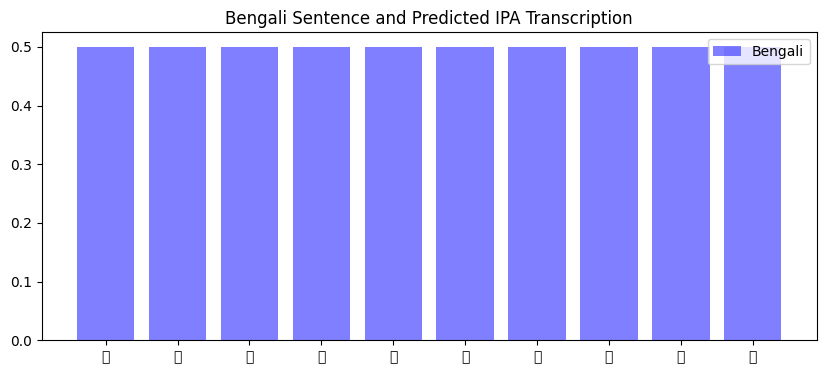

In [ ]:
# Split the sentence and IPA transcription into lists of characters
bengali_chars = [char for char in bengali_sentence if char != ' ']
ipa_chars = [char for char in predicted_ipa if char != ' ']

# Create a bar chart
plt.figure(figsize=(10, 4))
plt.bar(range(len(bengali_chars)), [0.5] * len(bengali_chars), tick_label=bengali_chars, label="Bengali", color='b', alpha=0.5)
# plt.bar(range(len(ipa_chars)), [0.5] * len(ipa_chars), tick_label=ipa_chars, label="IPA", color='r', alpha=0.5)
plt.title("Bengali Sentence and Predicted IPA Transcription")
plt.legend()

plt.show()

In [ ]:
def predict_ipa_sentence(bengali_sentence):
    max_sequence_length=200
    if not bengali_word:
        return "Input is empty"  # Handle empty input

    bengali_word_seq = input_tokenizer.texts_to_sequences([bengali_word])
    bengali_word_seq = pad_sequences(bengali_word_seq, padding='post', maxlen=max_sequence_length)  # Use a defined max_sequence_length

    # Check if the sequence is correctly shaped
    if bengali_word_seq.shape != (1, max_sequence_length):
        return "Input shape mismatch"

    predicted_ipa_seq = model.predict(bengali_word_seq)
    # Tokenize the Bengali sentence into words
    bengali_words = bengali_sentence.split()

    # Create an empty list to store the predicted IPA transcriptions for each word
    predicted_ipa_transcriptions = []

    for word in bengali_words:
        try:
            predicted_ipa = predict_ipa(word)
            predicted_ipa_transcriptions.append(predicted_ipa)
        except Exception as e:
            # Handle any errors during prediction for individual words
            print(f"Error predicting IPA for word '{word}': {str(e)}")

    # Join the predicted transcriptions
    predicted_ipa_sentence = '     '.join(predicted_ipa_transcriptions)

    return predicted_ipa_sentence


# # Testing the test dataset

In [ ]:
import pandas as pd

# Load your test dataset
test_dataset = pd.read_csv("/content/testData.csv")  # Replace with the actual path to your test dataset
tests_df = pd.DataFrame(test_dataset)

# Extract the input (Bengali words or sentences) from the test dataset
# test_input = test_dataset["text"].tolist()  # Replace with the actual column name in your test dataset
# print(test_input)
print(tests_df)


       row_id_column_name                                               text
0                       0  বিশেষ অতিথি এফএম ইকবাল বিন আনোয়ার (ডন) অ্যাডিশ...
1                       1  এ নিয়ে বিবাদে ২০১৫ সালের ২ জুন রাত সাড়ে ১১টায় ...
2                       2   আজ থেকে ১৪ বছর আগে তিনি চলে গেছেন না ফেরার দেশে।
3                       3  নিহত ব্যক্তি কুতপালং টালের ই-২ ব্লকের আবুল বাছ...
4                       4  সংক্ষিপ্ত স্কোরশ্রীলংকা প্রথম ইনিংস ৪৮২ (করুনা...
...                   ...                                                ...
27223               27223  পছন্দের তারকার সঙ্গে কাজ করার সুযোগ পেয়ে অন্যর...
27224               27224  বাংলাদেশ রেলওয়ে সিলেট ডিভিশনের সহকারী নির্বাহী...
27225               27225  প্রতিমন্ত্রী আরও বলেন, এসব প্যাকেট মিল্কভিটার ...
27226               27226             এগুলো নিয়ে নয়া প্রচেষ্টা শুরু করেছে।
27227               27227  তবে নগরবাসীর সুবিধা নয়, ট্রাফিক পুলিশ তাদের সু...

[27228 rows x 2 columns]


In [ ]:
# Split text into words and create a new DataFrame
test_df = tests_df['text'].str.split(expand=True).stack().reset_index(level=1, drop=True).reset_index(name='text')
print(test_df)

        index     text
0           0    বিশেষ
1           0    অতিথি
2           0     এফএম
3           0    ইকবাল
4           0      বিন
...       ...      ...
316768  27227      ওয়ে
316769  27227     করছে
316770  27227      এমন
316771  27227   অভিযোগ
316772  27227  অনেকের।

[316773 rows x 2 columns]


In [ ]:
# predict_ipa_sentence(bengali_sentence)
import pandas as pd

# Load your test dataset
test_dataset = pd.read_csv("/content/testData.csv")  # Replace with the actual path to your test dataset

# Extract the input (Bengali words or sentences) from the test dataset
test_input = test_dataset["text"].tolist()  # Replace with the actual column name in your test dataset

# Create an empty list to store the predicted IPA transcriptions
predicted_ipa_transcriptions = []

# Iterate through each input in the test dataset
for input_text in test_input:
    predicted_ipa = predict_ipa_sentence(input_text)  # Use your predict_ipa function
    # try:
    #   predicted_ipa = predict_ipa(input_text)  # Use your predict_ipa function
    # except Exception as e:
    #   print("Error during prediction:", str(e))

    predicted_ipa_transcriptions.append(predicted_ipa)

# Add the predicted IPA transcriptions to the test dataset
test_dataset["predicted_ipa"] = predicted_ipa_transcriptions

# Print the updated test dataset with predicted IPA transcriptions
print(test_dataset)

# Evaluate the model's performance if you have ground truth IPA transcriptions
# You can compare the predicted IPA transcriptions to the ground truth and calculate relevant metrics.


Streaming output truncated to the last 5000 lines.
	 [[{{node TensorArrayV2Stack/TensorListStack}}]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_predict_function_157561]
1/1 [==============================] - 0s 43ms/step
Error predicting IPA for word 'পরিচালন': Graph execution error:

Detected at node TensorArrayV2Stack/TensorListStack defined at (most recent call last):
<stack traces unavailable>
Tried to stack list which only contains uninitialized tensors and has a non-fully-defined element_shape: [?,100]
	 [[{{node TensorArrayV2Stack/TensorListStack}}]]
	 [[sequential/lstm/PartitionedCall]] [Op:__inference_predict_function_157561]
Error predicting IPA for word 'মানদণ্ড': Graph execution error:

Detected at node TensorArrayV2Stack/TensorListStack defined at (most recent call last):
<stack traces unavailable>
Tried to stack list which only contains uninitialized tensors and has a non-fully-defined element_shape: [?,100]
	 [[{{node TensorArrayV2Stack/TensorListStack}}]]
	 [

In [ ]:
# Save the updated test dataset with predicted IPA transcriptions to a CSV file
test_dataset.to_csv("predicted_test_data.csv", index=False)  # Replace "predicted_test_data.csv" with your desired file name


NameError: ignored

In [ ]:
# import pandas as pd

# # Load your test dataset
# test_dataset = pd.read_csv("/content/testData.csv")  # Replace with the actual path to your test dataset

# # Extract the input (Bengali words or sentences) from the test dataset
# test_input = test_dataset["text"].tolist()  # Replace with the actual column name in your test dataset

# # Create an empty list to store the predicted IPA transcriptions
# predicted_ipa_transcriptions = []

# # Iterate through each input in the test dataset
# for input_text in test_input:
#     # predicted_ipa = predict_ipa(input_text)  # Use your predict_ipa function
#     try:
#       predicted_ipa = predict_ipa(input_text)  # Use your predict_ipa function
#     except Exception as e:
#       print("Error during prediction:", str(e))

#     predicted_ipa_transcriptions.append(predicted_ipa)

# # Add the predicted IPA transcriptions to the test dataset
# test_dataset["predicted_ipa"] = predicted_ipa_transcriptions

# # Print the updated test dataset with predicted IPA transcriptions
# print(test_dataset)

# # Evaluate the model's performance if you have ground truth IPA transcriptions
# # You can compare the predicted IPA transcriptions to the ground truth and calculate relevant metrics.
